## IPL Auction 2022 Data - Analysis
Finding 11 best players


In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset 

In [2]:
df = pd.read_csv('IPLData.csv')

In [3]:
df.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Player Name', 'Team', 'Nationality', 'Player_Type', 'Capped',
       'Matches_Played', 'Runs', 'Average', 'Strike_Rate', 'Wickets',
       'Bowling_average', 'Economy', 'Bowling_Strike_Rate', 'Catches',
       'Run_outs', 'Stumps'],
      dtype='object')

In [5]:
df.shape

(235, 16)

# Observation
The dataset has 235 rows and 16 columns

In [6]:
df.size

3760

In [7]:
df.dtypes

Player Name             object
Team                    object
Nationality             object
Player_Type             object
Capped                   int64
Matches_Played         float64
Runs                   float64
Average                float64
Strike_Rate            float64
Wickets                float64
Bowling_average        float64
Economy                float64
Bowling_Strike_Rate    float64
Catches                float64
Run_outs               float64
Stumps                 float64
dtype: object

## Observation
The dataset consists of data types object, int64 and float64

The dataset has majority of float64 datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

In [9]:
df.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


## Observation
1. **Missing Data**: Addressing missing data is crucial for data analysis.
   
2. **Wide Ranges of Metrics**: Diverse player performance levels need segmentation for meaningful analysis.

3. **Outliers**: Handling outliers is essential to prevent skewed results.

### Finding missing values 

In [10]:
df.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

## Observation
We encounter alot of missing values in this dataset

## Data cleaning 
Sorting data into - capped and uncapped with their specific categories as follows:

Batters

Bowlers

Allrounders

Wicket Keepers




In [11]:
batters = df.loc[(df['Player_Type'] == 'Batter')]

In [12]:
batters_cap = batters.loc[(batters['Capped'] == 1)]

In [13]:
Capped_Batters = batters_cap[['Player Name','Team','Nationality','Matches_Played','Runs','Average','Strike_Rate']]

In [14]:
Capped_Batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


## Observation 
These batters have a history of playing IPL Matches

In [15]:
df['Player_Type'] = df['Player_Type'].astype(str).str.strip() #Bowler column name had some extra characters

# Filter for 'Bowler'
bowlers = df[df['Player_Type'] == 'Bowler']

In [16]:
bowlers.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
36,Kagiso Rabada,Punjab,Overseas,Bowler,1,50.0,138.0,13.80,102.99,76.0,20.53,8.21,15.00,NaN,NaN,NaN
37,Trent Boult,Rajasthan,Overseas,Bowler,1,62.0,13.0,4.33,68.42,76.0,26.09,8.40,18.64,NaN,NaN,NaN
38,Mohammad Shami,Gujarat,Indian,Bowler,1,77.0,69.0,6.27,94.53,79.0,30.41,8.63,21.14,NaN,NaN,NaN
39,T Natarajan,Hyderabad,Indian,Bowler,1,24.0,3.0,3.00,60.00,20.0,34.40,8.24,25.05,NaN,NaN,NaN
40,Deepak Chahar,Chennai,Indian,Bowler,1,63.0,79.0,11.29,138.60,59.0,29.19,7.80,22.44,NaN,NaN,NaN


In [17]:
bowlers_cap = bowlers.loc[(bowlers['Capped'] == 1)]

In [18]:
Capped_Bowlers = bowlers_cap[['Player Name','Team','Nationality','Matches_Played','Wickets','Bowling_average','Economy','Bowling_Strike_Rate']]

In [19]:
Capped_Bowlers.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,62.0,76.0,26.09,8.40,18.64
38,Mohammad Shami,Gujarat,Indian,77.0,79.0,30.41,8.63,21.14
39,T Natarajan,Hyderabad,Indian,24.0,20.0,34.40,8.24,25.05
40,Deepak Chahar,Chennai,Indian,63.0,59.0,29.19,7.80,22.44


## Observation
These bowlers have palyed in the IPL before

In [20]:
keepers = df[df['Player_Type'] == 'Keeper']

In [21]:
keepers.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,Keeper,1,77.0,2256.0,31.3,130.9,NaN,NaN,NaN,NaN,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,Keeper,1,175.0,3916.0,29.4,127.5,NaN,NaN,NaN,NaN,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,Keeper,1,61.0,1452.0,28.5,136.3,NaN,NaN,NaN,NaN,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,Keeper,1,28.0,1038.0,41.5,142.2,NaN,NaN,NaN,NaN,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,Keeper,1,213.0,4046.0,25.8,129.7,NaN,NaN,NaN,NaN,123.0,14.0,32.0


In [22]:
keepers_cap = keepers.loc[(keepers['Capped'] == 1)]
Capped_Keepers = keepers_cap[['Player Name','Team','Nationality','Matches_Played','Runs','Average','Strike_Rate','Catches','Run_outs','Stumps']]

In [23]:
Capped_Keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


## Observation
These keepers have played in the IPL before

In [24]:
ars = df[df['Player_Type'] == 'Allrounder']

In [25]:
ars.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
127,Ravichandran Ashwin,Rajasthan,Indian,Allrounder,1,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12,NaN,NaN,NaN
128,Pat Cummins,Kolkata,Overseas,Allrounder,1,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95,NaN,NaN,NaN
129,Dwayne Bravo,Chennai,Overseas,Allrounder,1,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44,NaN,NaN,NaN
130,Nitish Rana,Kolkata,Indian,Allrounder,1,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43,NaN,NaN,NaN
131,Jason Holder,Lucknow,Overseas,Allrounder,1,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43,NaN,NaN,NaN


In [26]:
ars_cap = ars.loc[(ars['Capped'] == 1)]
Capped_Allrounders = ars_cap[['Player Name','Team','Nationality','Matches_Played','Runs','Average','Strike_Rate','Wickets','Bowling_average','Economy','Bowling_Strike_Rate']]

In [27]:
Capped_Allrounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43


## Observation
These keepers have played in the IPL before

## Data cleaning by fill the null/Na values

In [28]:
Capped_Batters = Capped_Batters.fillna(0)
Capped_Bowlers = Capped_Bowlers.fillna(0)
Capped_Keepers = Capped_Keepers.fillna(0)
Capped_Allrounders = Capped_Allrounders.fillna(0)

In [29]:
#Now checking if any null values are left


In [30]:
Capped_Batters.isna().sum()

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64

In [31]:
Capped_Bowlers.isna().sum()

Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64

In [32]:
Capped_Keepers.isna().sum()

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64

In [33]:
Capped_Allrounders.isna().sum()

Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64

### No null values are left

In [34]:
Capped_Batters.describe()

,Matches_Played,Runs,Average,Strike_Rate
count,32.000000,32.000000,32.000000,32.000000
mean,78.312500,2026.093750,28.769062,129.749687
std,64.738899,1882.396351,8.500194,10.131932
min,1.000000,16.000000,11.000000,101.320000
25%,21.750000,470.000000,24.060000,123.990000
50%,62.500000,1448.500000,29.100000,130.275000
75%,107.500000,3019.500000,31.977500,136.320000
max,213.000000,6283.000000,47.430000,151.170000


### Selecting top batters with batting average above 32.0

In [35]:
top_batters = Capped_Batters.loc[(Capped_Batters['Average'] >=32.0)]

In [36]:
#Sorting the data in descending order/

In [37]:
top_batters_average = top_batters.sort_values('Average',ascending=False)

In [38]:
top_batters_strikerate = top_batters.sort_values('Strike_Rate',ascending=False)

In [39]:
top_batters_runs = top_batters.sort_values('Runs',ascending=False)

In [40]:
top_batters_matches = top_batters.sort_values('Matches_Played',ascending=False)

In [41]:
top_batters_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51


## Observation
KL Rahul is the top batter according to Average

In [42]:
top_batters_strikerate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


## Observation
David Warner is the top batter according to strike rate

In [43]:
top_batters_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


## Observation
Virat Kohli is the top batter according to Runs

In [44]:
top_batters_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


## Observation
Virat Kohli has played the most IPL matches

## Observation

According to the overall analysis , top 3 batters are:
1. David Warner
2. KL Rahul
3. Virat Kohli

### Selecting top batters with bowling average below 24.0

In [45]:
top_bowlers = Capped_Bowlers.loc[(Capped_Bowlers['Bowling_average'] <=24.0)]

In [46]:
#Sorting the data 

In [47]:
top_bowlers_average = top_bowlers.sort_values('Bowling_average')

In [48]:
top_bowlers_strikerate = top_bowlers.sort_values('Bowling_Strike_Rate')

In [49]:
top_bowlers_wickets = top_bowlers.sort_values('Wickets',ascending=False)

In [50]:
top_bowlers_economy = top_bowlers.sort_values('Economy')

In [51]:
top_bowlers_matches = top_bowlers.sort_values('Matches_Played',ascending=False)

In [52]:
 top_bowlers_average

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23


In [53]:
top_bowlers_strikerate

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61


In [54]:
top_bowlers_wickets

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00


## Observation
Yuzvendra Chahal has taken the most wickets i.e. 139.0

In [55]:
top_bowlers_economy

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67


## Observation

From the overall analysis , here are the top 4 bowlers:
1. Kagiso Rabada
2. Jasprit Bumrah
3. Yuzvendra Chahal
4. Nathan Coulter - Nile

### Selecting top allrounders based on strike rate 140 or above

In [56]:
top_allrounders = Capped_Allrounders.loc[(Capped_Allrounders['Strike_Rate'] >=140.0)]

In [57]:
top_allrounders_average = top_allrounders.sort_values('Average',ascending = False)

In [58]:
top_allrounders_sr = top_allrounders.sort_values('Strike_Rate',ascending = False)

In [59]:
top_allrounders_runs = top_allrounders.sort_values('Runs',ascending = False)

In [60]:
top_allrounders_matches = top_allrounders.sort_values('Matches_Played',ascending = False)

In [61]:
top_allrounders_bowlingavg = top_allrounders.sort_values('Bowling_average')

In [62]:
top_allrounders_wickets = top_allrounders.sort_values('Wickets',ascending = False)

In [63]:
top_allrounders_economy = top_allrounders.sort_values('Economy')

In [64]:
top_allrounders_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38


In [65]:
top_allrounders_sr

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69


In [66]:
top_allrounders_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [67]:
top_allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [68]:
top_allrounders_bowlingavg

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [69]:
top_allrounders_wickets

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [70]:
top_allrounders_economy

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51


## Observation
From overall analysis, here are the top 4 Allrounders are:
1. Andre Russel
2. Sunil Narine
3. Hardik Pandya
4. Jofra Archer

### Selecting top keepers averaging more than 25.0

In [71]:
top_keepers = Capped_Keepers.loc[(Capped_Keepers['Average']>= 25.0)]

In [72]:
#Sorting the data

In [73]:
top_keepers_avg = top_keepers.sort_values('Average',ascending= False)

In [74]:
top_keepers_sr = top_keepers.sort_values('Strike_Rate',ascending= False)

In [75]:
top_keepers_runs = top_keepers.sort_values('Runs',ascending= False)

In [76]:
top_keepers_matches = top_keepers.sort_values('Matches_Played',ascending= False)

In [77]:
top_keepers_catches = top_keepers.sort_values('Catches',ascending= False)

In [78]:
top_keepers_ros = top_keepers.sort_values('Run_outs',ascending= False)

In [79]:
top_keepers_stumps = top_keepers.sort_values('Stumps',ascending= False)

In [80]:
top_keepers_avg

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [81]:
top_keepers_sr

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [82]:
top_keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [83]:
top_keepers_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [84]:
top_keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [85]:
top_keepers_ros

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [86]:
top_keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


## Observation
From overall analysis the top 3 Keepers are:
1. MS Dhoni
2. Dinesh Karthik
3. Rishabh Pant

## Data visualizations

<AxesSubplot:xlabel='Player Name', ylabel='Strike_Rate'>

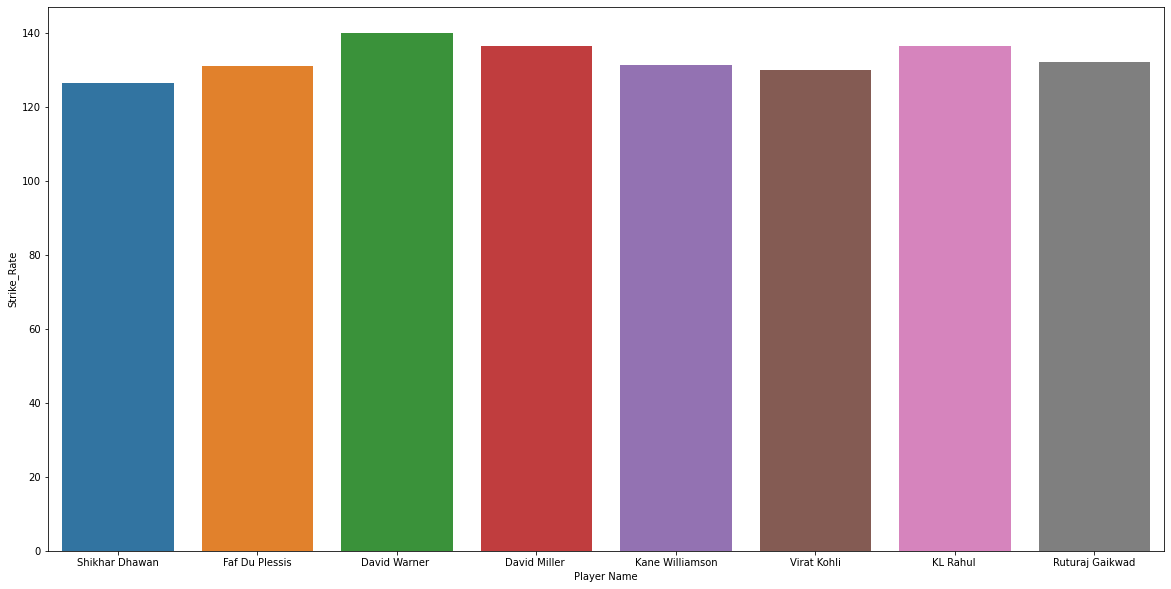

In [87]:
#Batters with top strike rate
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_batters)

## Observation
According to strike rate, David Warner and KL Rahul are at the top followed by Davild Miller

<AxesSubplot:xlabel='Player Name', ylabel='Runs'>

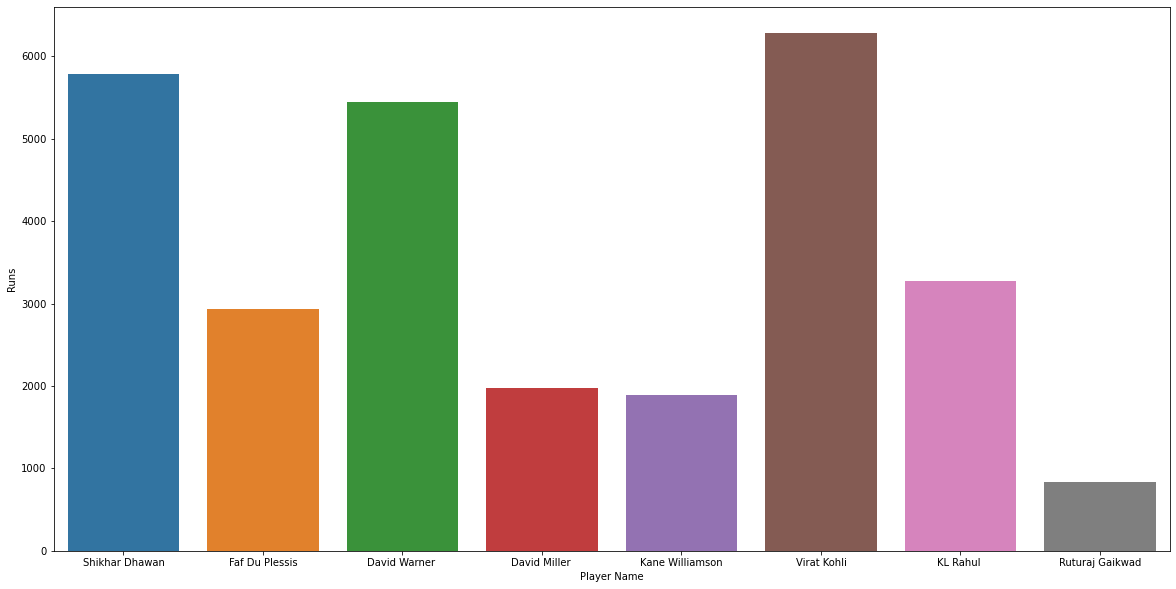

In [88]:
#Batters with top runs
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_batters)

## Observation
According to runs, Virat Kohli is at the top followed closely by Shikhar dhawan and David Warner

<AxesSubplot:xlabel='Player Name', ylabel='Average'>

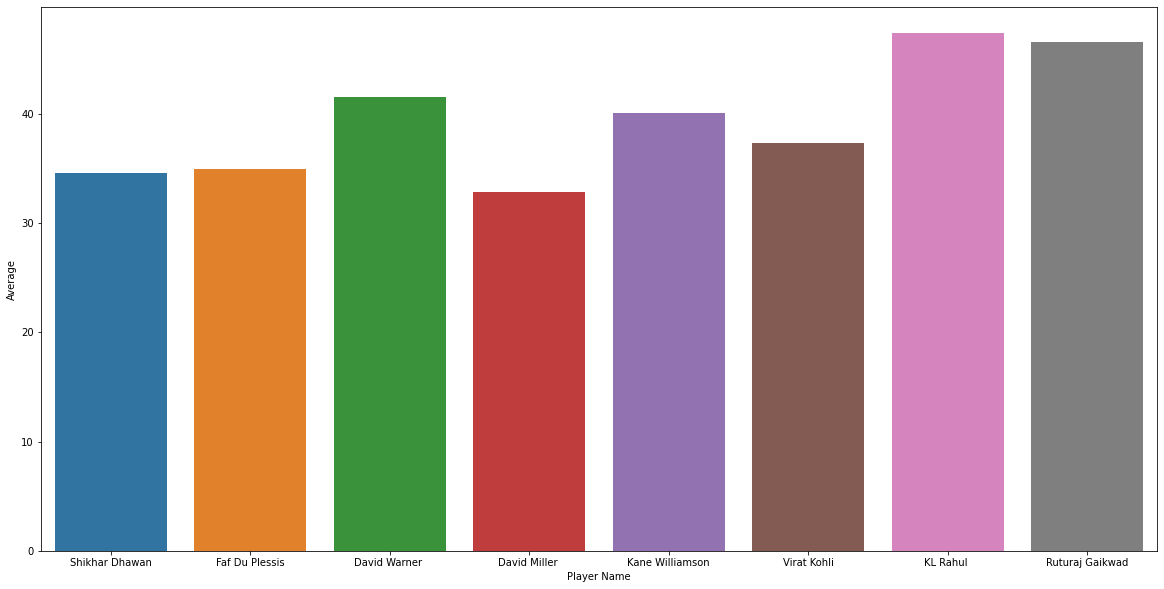

In [89]:
#Top batters and average
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Average',data=top_batters)

## Observations
KL Rahul and Ruturaj Gaikwad have good average followed by David Warner

<AxesSubplot:xlabel='Player Name', ylabel='Matches_Played'>

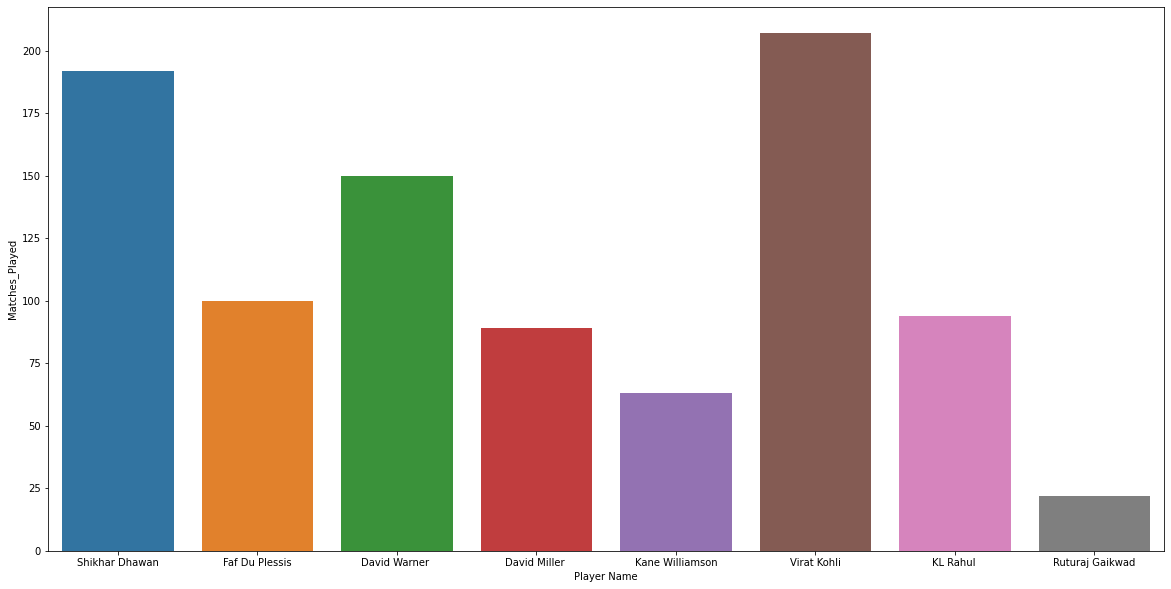

In [90]:
#Top batters and matches played
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Matches_Played',data=top_batters)

## Observation

David Warner, Virat Kohli and KL Rahul are the top 3 batters according to this data

### Bowlers 

<AxesSubplot:xlabel='Player Name', ylabel='Bowling_average'>

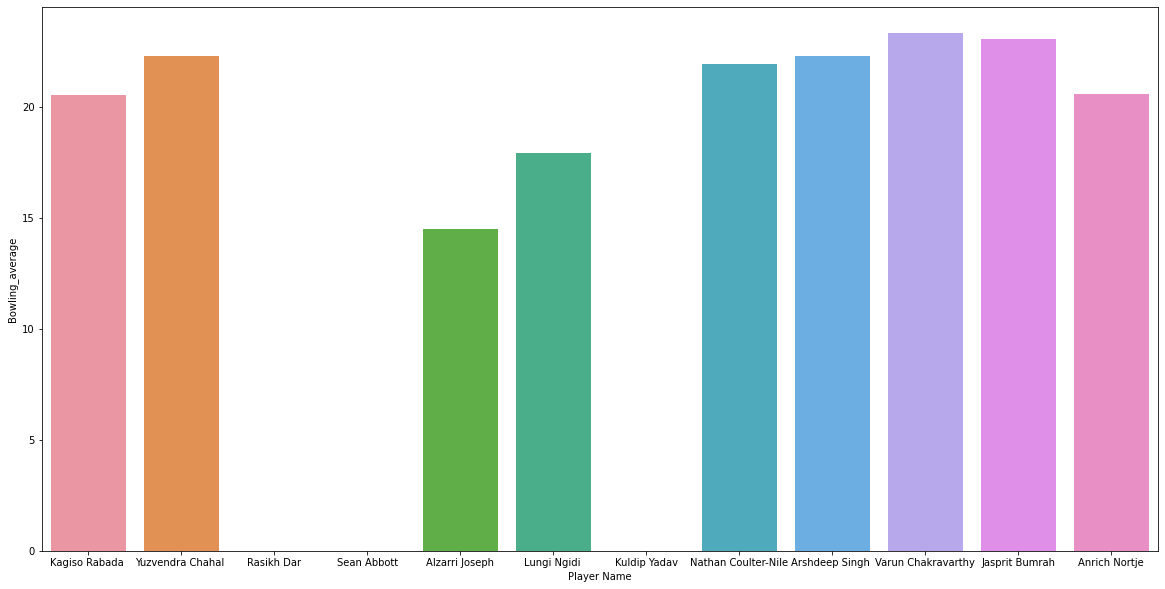

In [91]:
#Top bowlers and average
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_average',data=top_bowlers)

## Observation
1. We dont have enough values for some players
2. Alzarri Joseph and Lungi Ngidi are in competition

<AxesSubplot:xlabel='Player Name', ylabel='Economy'>

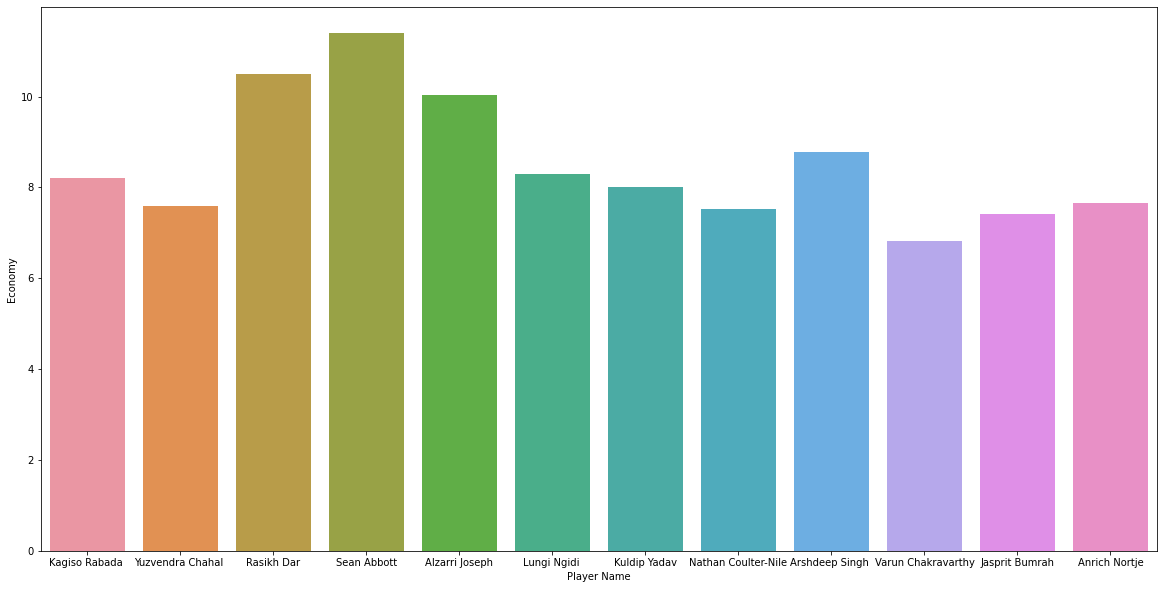

In [92]:
#Top bowlers and Economy
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Economy',data=top_bowlers)

## Observation
Varun , Jasprit, Anrich and Chahal have lower economies

<AxesSubplot:xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

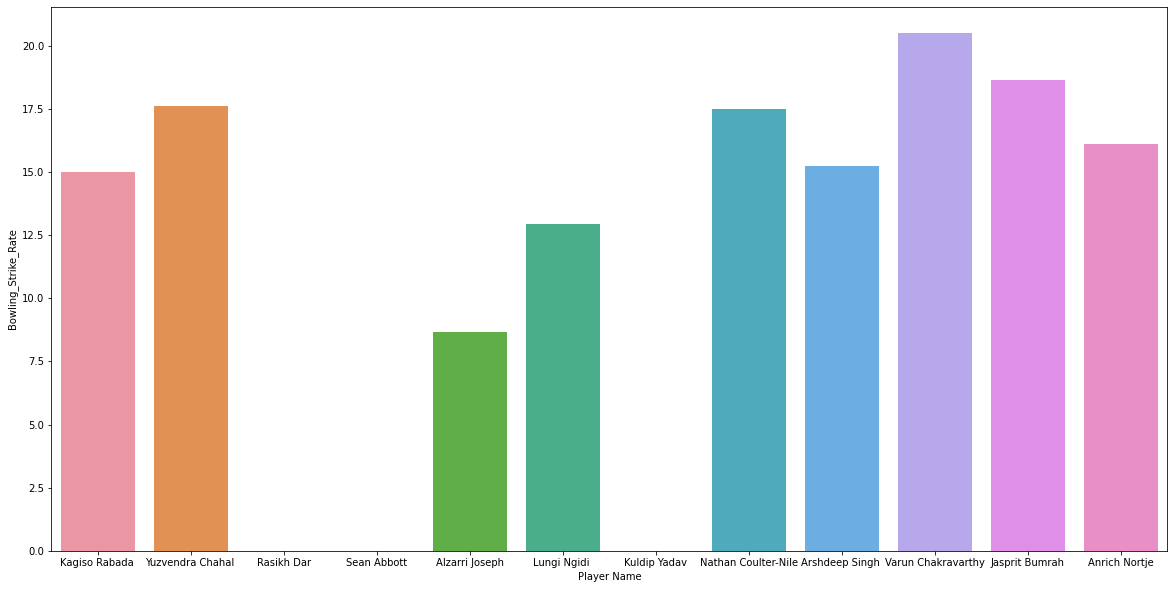

In [93]:
#Top bowlers and Strike Rate
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_Strike_Rate',data=top_bowlers)

<AxesSubplot:xlabel='Player Name', ylabel='Wickets'>

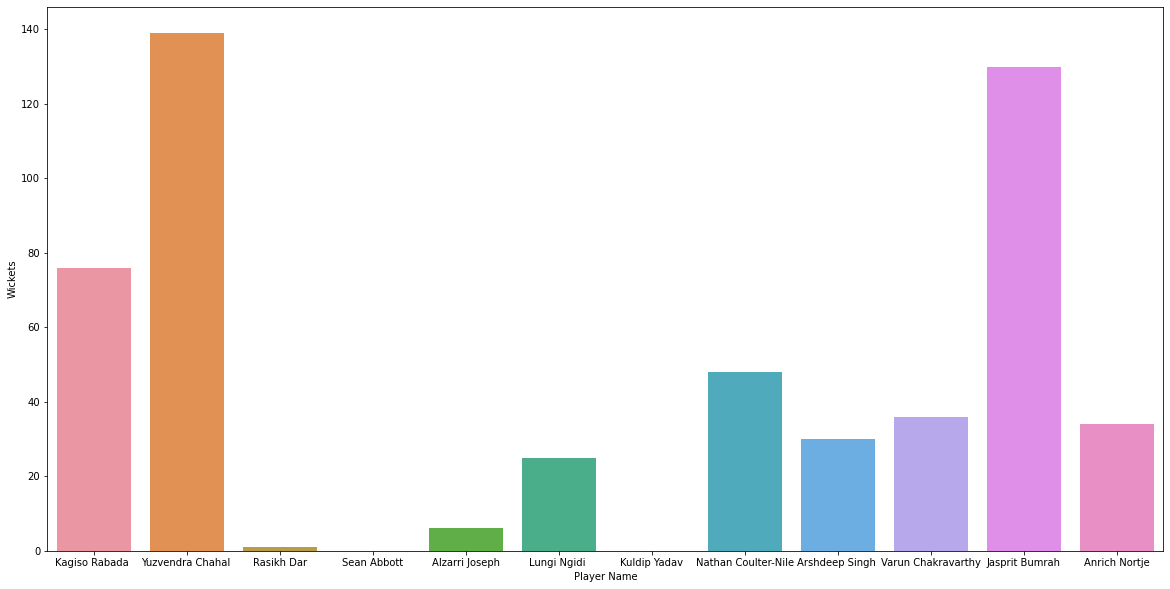

In [94]:
#Top bowlers and Wickets
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Wickets',data=top_bowlers)

## Observation
Chahal and Bumrah are topping the charts for wickets taken

<AxesSubplot:xlabel='Player Name', ylabel='Matches_Played'>

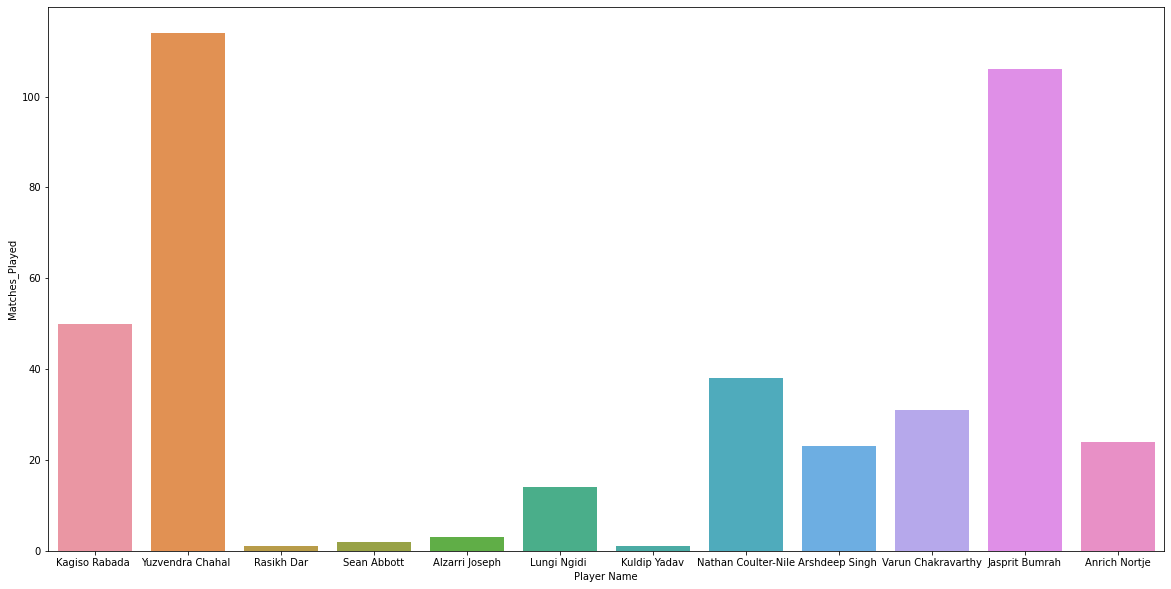

In [96]:
#Top bowlers and Matches played
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Matches_Played',data=top_bowlers)

## Observation
From overall analysis, we have that top  2Bowlers in no particular order:
Yuzvendra Chahal and Jasprit Bumrah

In [97]:
## Allrounders

<AxesSubplot:xlabel='Player Name', ylabel='Strike_Rate'>

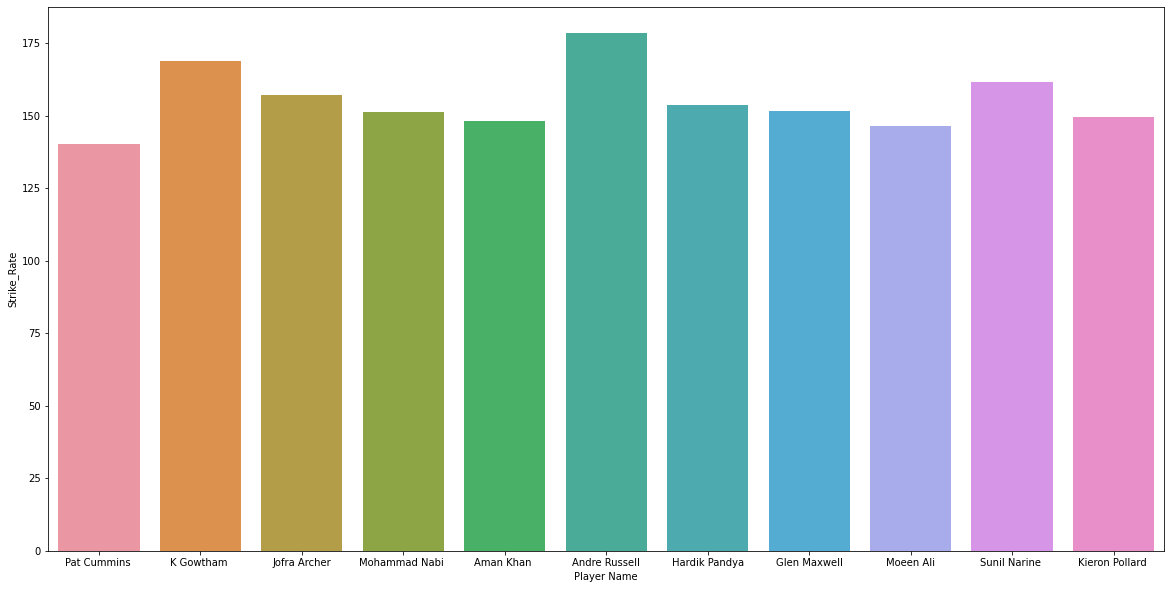

In [98]:
#Top allrounders and Strike Rate
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_allrounders)

## Observation
Andre Russel is topping the chart for strike rate followed closely by K Gowtham a
and Sunil Narine

<AxesSubplot:xlabel='Player Name', ylabel='Average'>

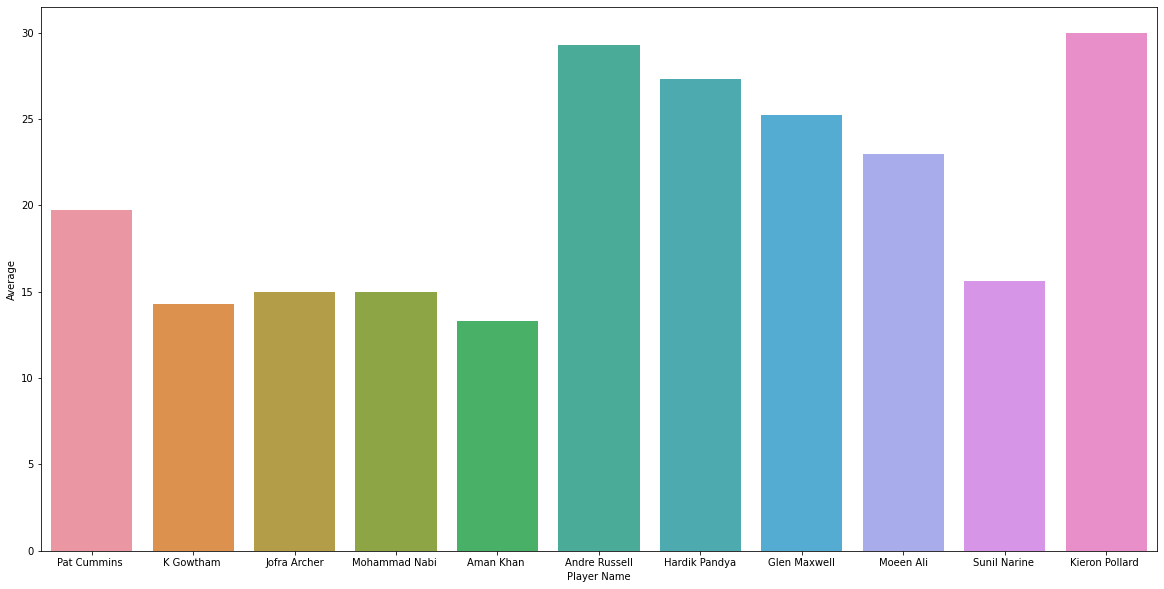

In [99]:
#Top allrounders and Average
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Average',data=top_allrounders)

## Observation
For average, 
Andre Russel is topping the chart followed very closely by Kieron Pollard and then Hardik Pandya

<AxesSubplot:xlabel='Player Name', ylabel='Matches_Played'>

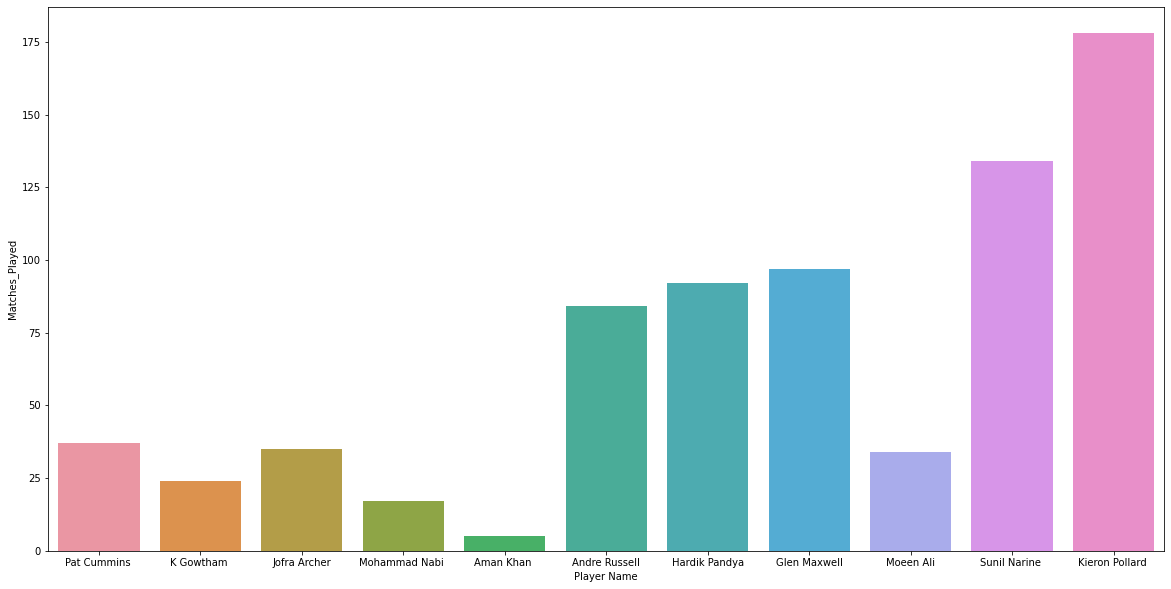

In [100]:
#Top allrounders and Matches played
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Matches_Played',data=top_allrounders)

## Observation
Kieron Pollard has played the most matches followed by Sunil Narine and Glen Maxwell

<AxesSubplot:xlabel='Player Name', ylabel='Runs'>

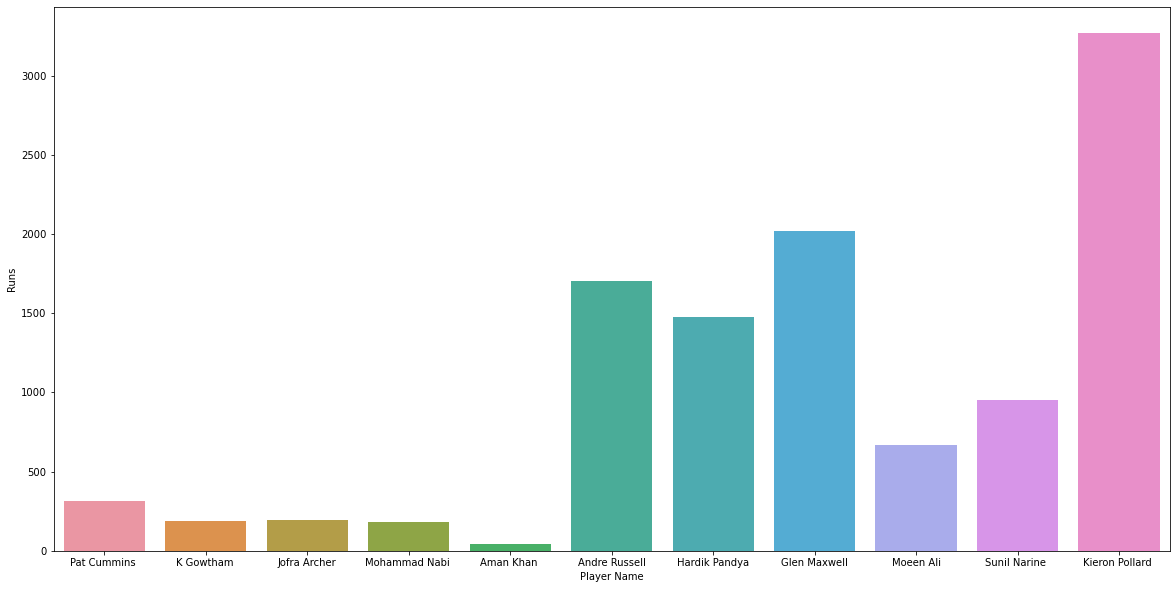

In [101]:
#Top allrounders and Runs
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_allrounders)

## Observation
Kieron Pollard has scored the most runs followed by Glen Maxwell and Andre Russel

<AxesSubplot:xlabel='Player Name', ylabel='Bowling_average'>

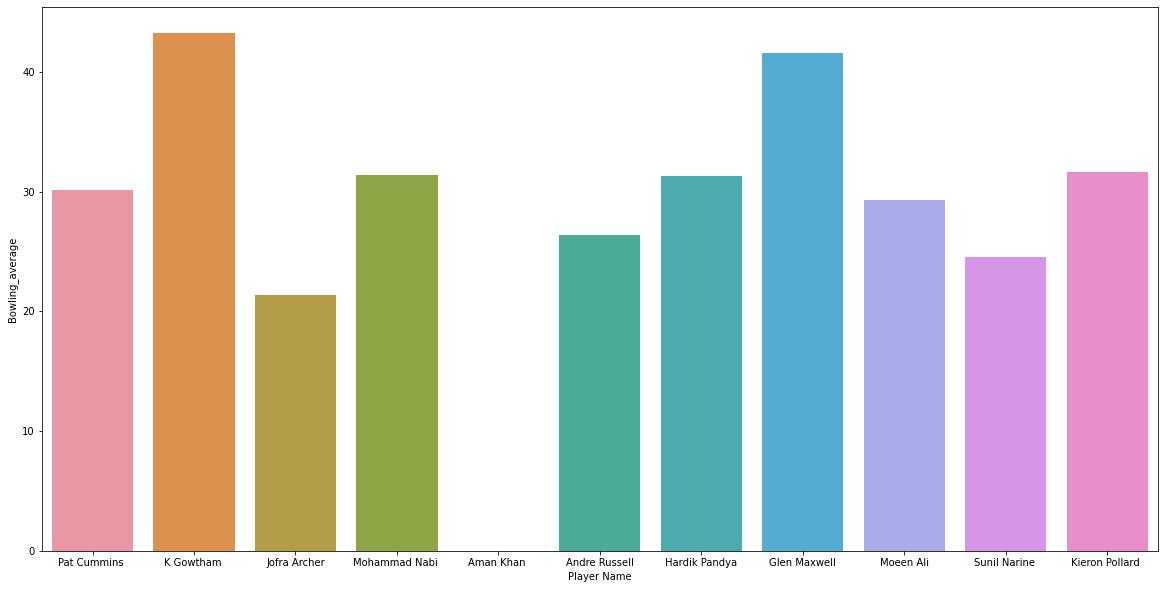

In [103]:
#Top allrounders and Runs
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_average',data=top_allrounders)

<AxesSubplot:xlabel='Player Name', ylabel='Economy'>

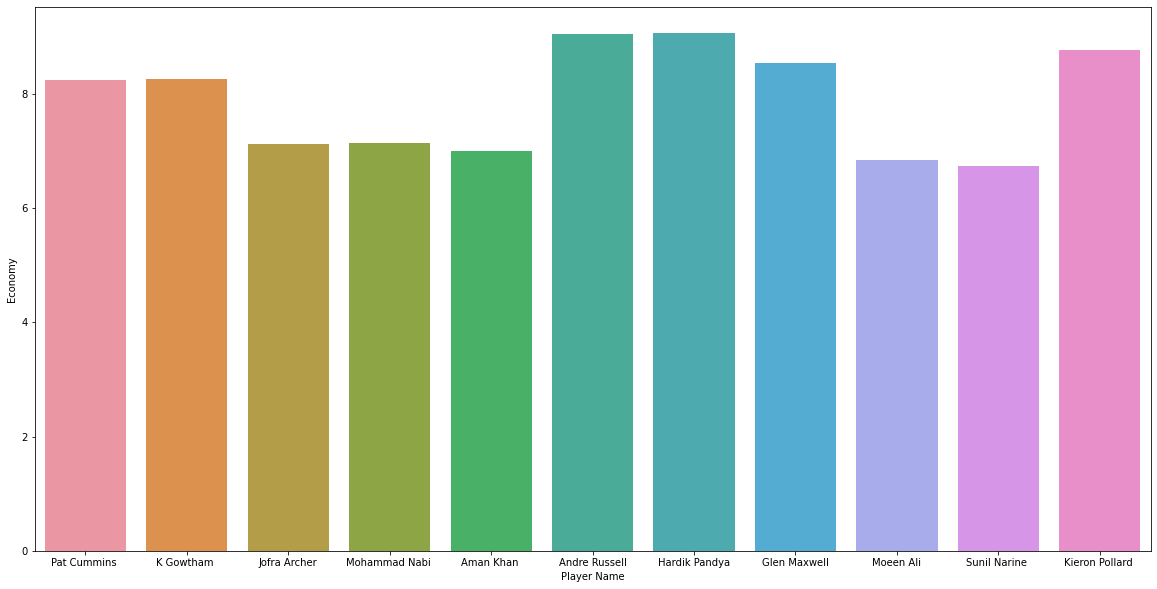

In [104]:
#Top allrounders and Runs
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Economy',data=top_allrounders)

## Observation
Data for Aman Khan is still considered as noise so he is not taken into account

Russel and Pandya are not efficient when it comes to Economy

<AxesSubplot:xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

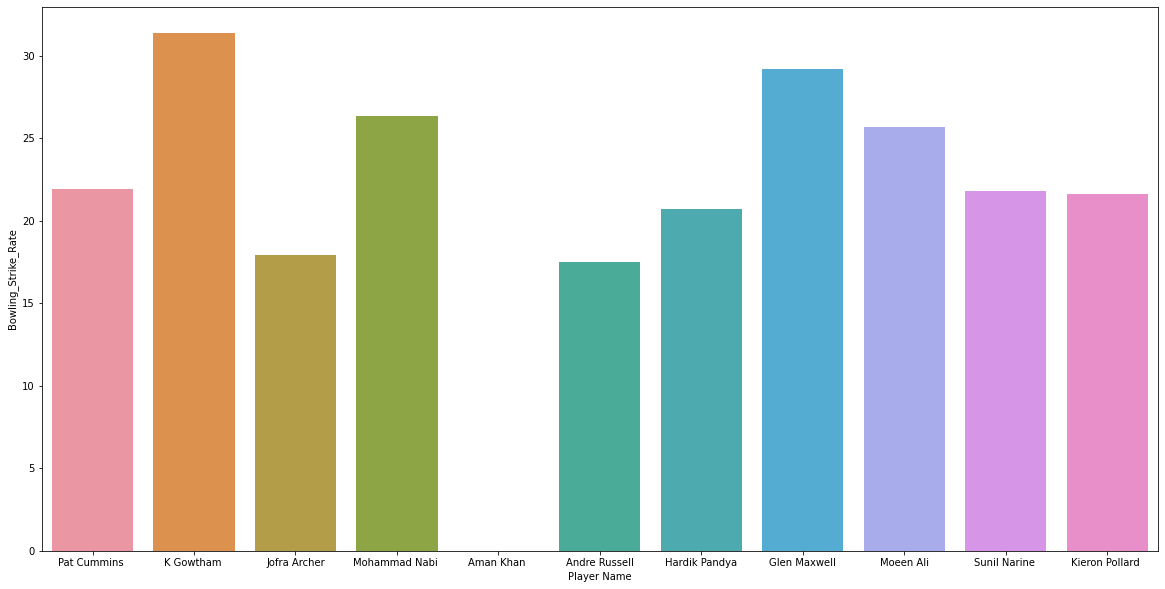

In [105]:
#Top allrounders and Runs
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Bowling_Strike_Rate',data=top_allrounders)

<AxesSubplot:xlabel='Player Name', ylabel='Wickets'>

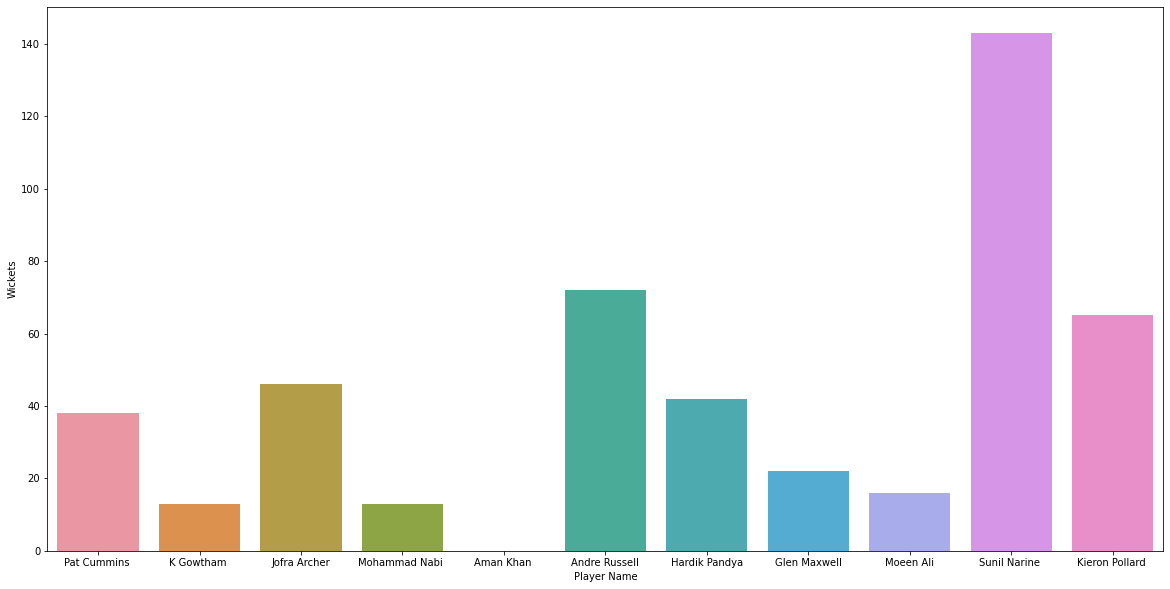

In [106]:
#Top allrounders and Runs
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Wickets',data=top_allrounders)

## Observation
Overall, we can say that
Hardik Pandya, Andre Russel and Sunil Narine are among the top choices as all rounders

In [108]:
#Keepers

<AxesSubplot:xlabel='Player Name', ylabel='Average'>

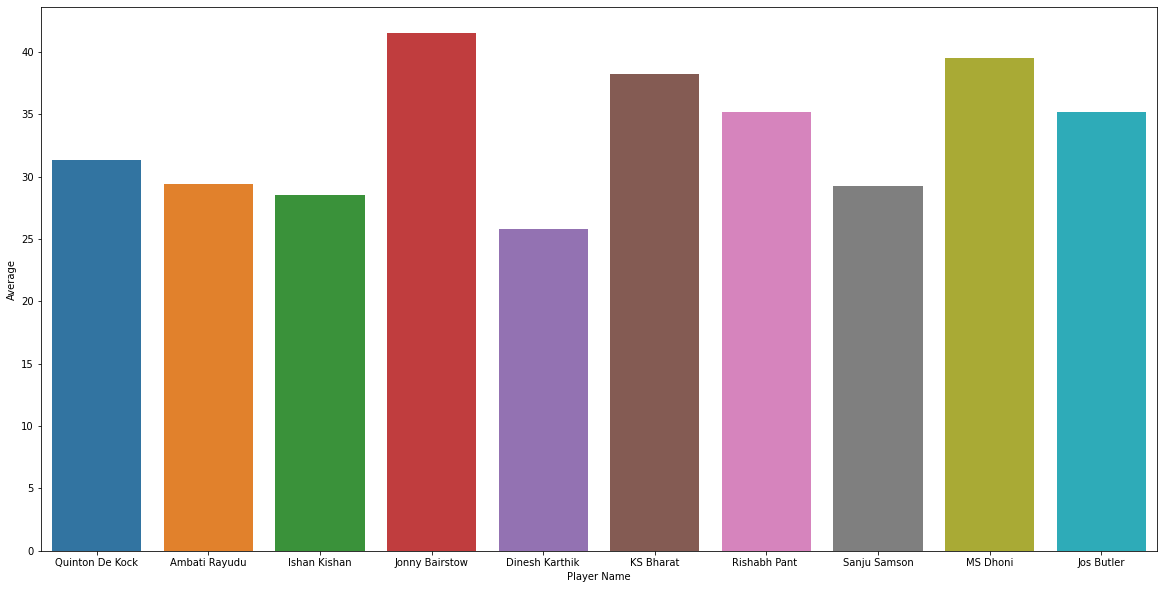

In [109]:
#Top keepers and Average
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Average',data=top_keepers)

## Observation 
Jonny Bairstow and MS Dhoni are topping the charts in Keepers Average


<AxesSubplot:xlabel='Player Name', ylabel='Runs'>

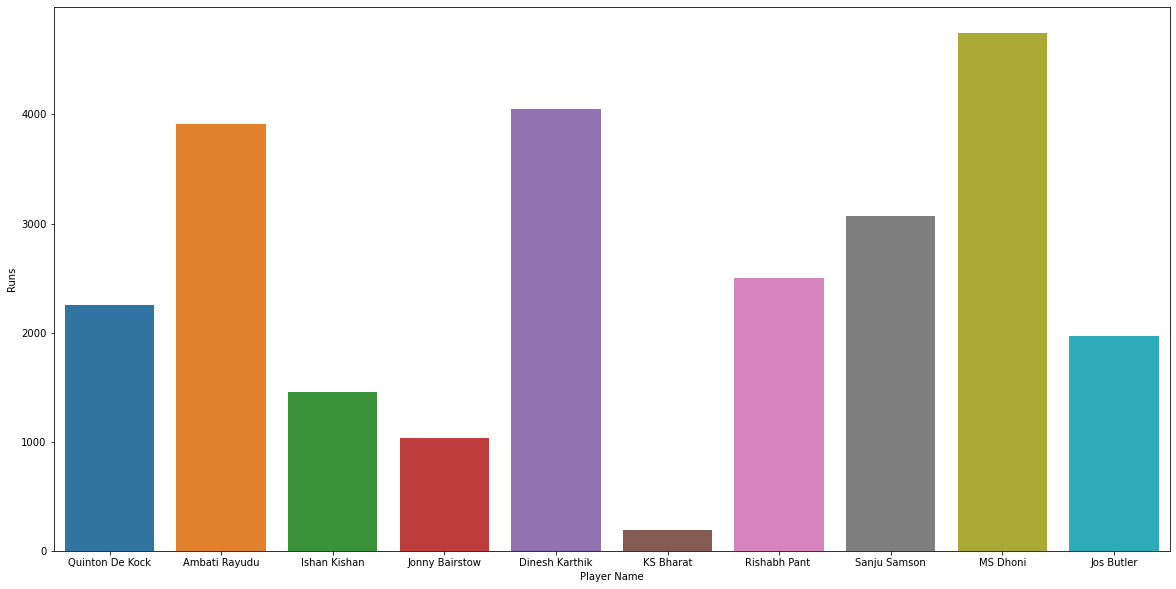

In [110]:
#Top keepers and Runs
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_keepers)

## Observation 
MS Dhoni and Dinesh Karthik are topping the charts in runs followed by
Ambati Rayudu


<AxesSubplot:xlabel='Player Name', ylabel='Strike_Rate'>

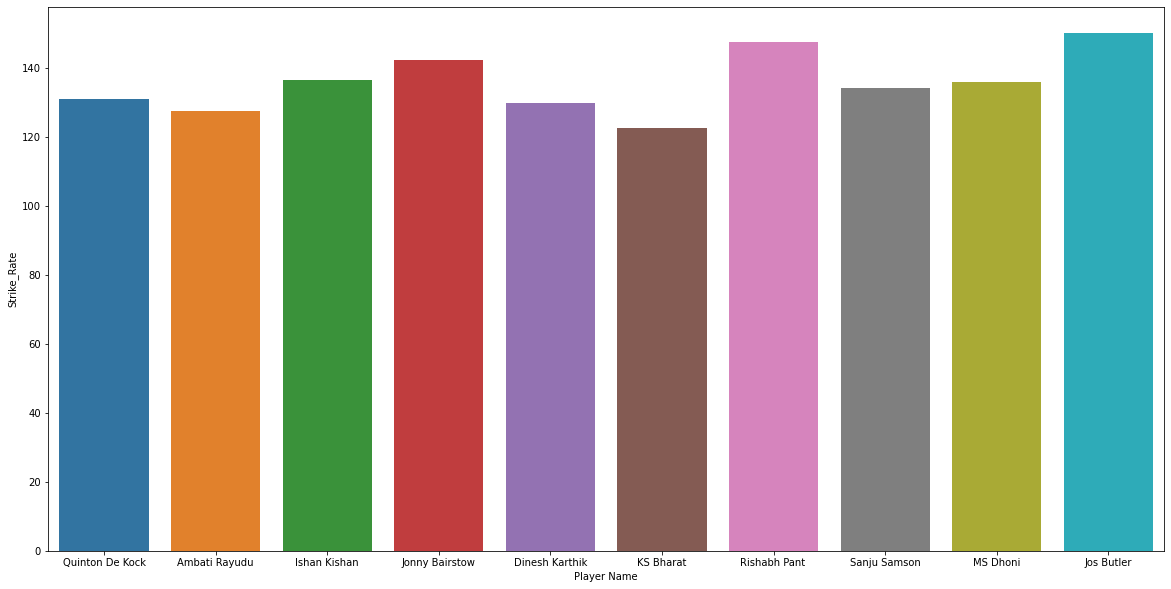

In [112]:
#Top keepers and Strike Rate
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_keepers)

## Observation 
Rishabh Pant is at the top here followed by Jos butler, Jonny bairstow and MS dHoni

<AxesSubplot:xlabel='Player Name', ylabel='Catches'>

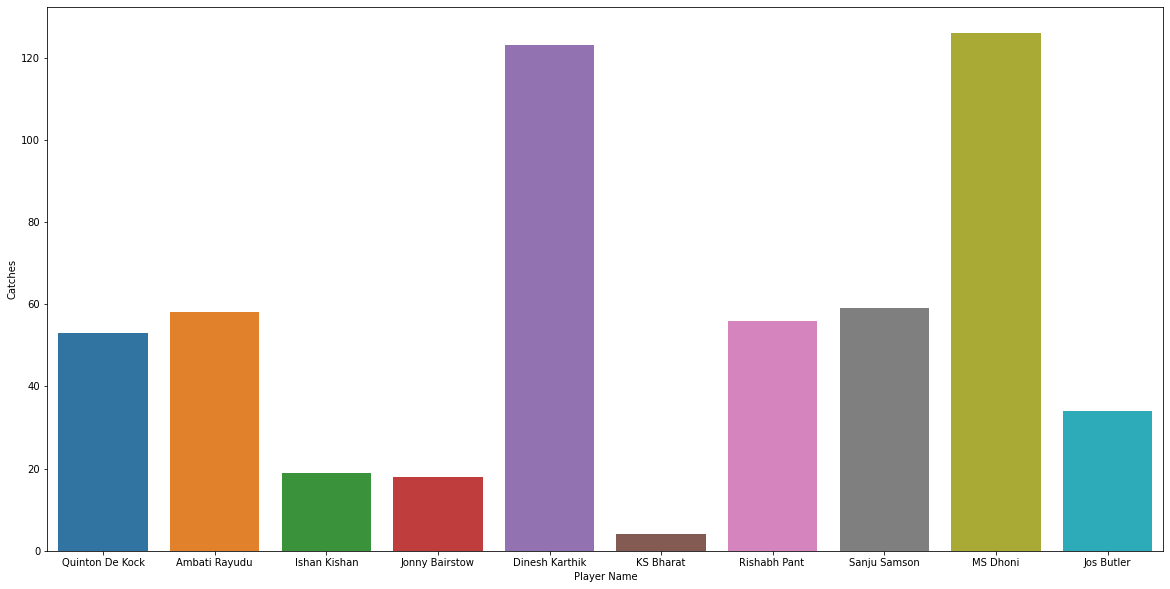

In [114]:
#Top keepers and Catches
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Catches',data=top_keepers)

## Observation
Dinesh karthik and MS Dhoni have the most catches

<AxesSubplot:xlabel='Player Name', ylabel='Run_outs'>

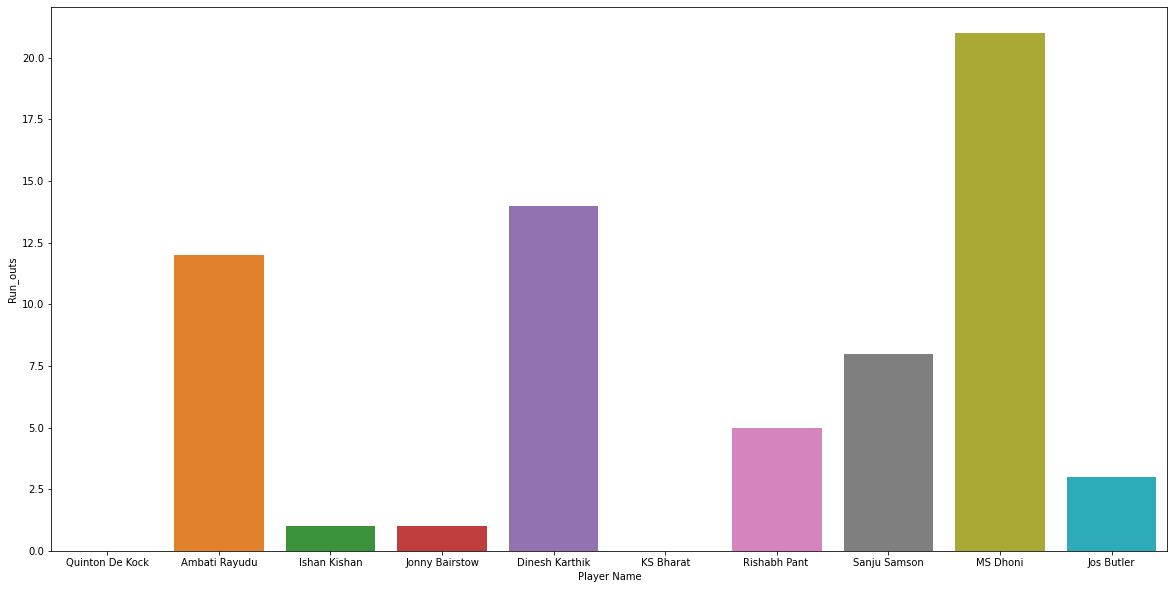

In [115]:
#Top keepers and run outs
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Run_outs',data=top_keepers)

## Observation
MS Dhoni tops the chart in Run outs followed by Dinesh Karthik and Ambati Rayudu, Rishabh Pant is in top 5

<AxesSubplot:xlabel='Player Name', ylabel='Matches_Played'>

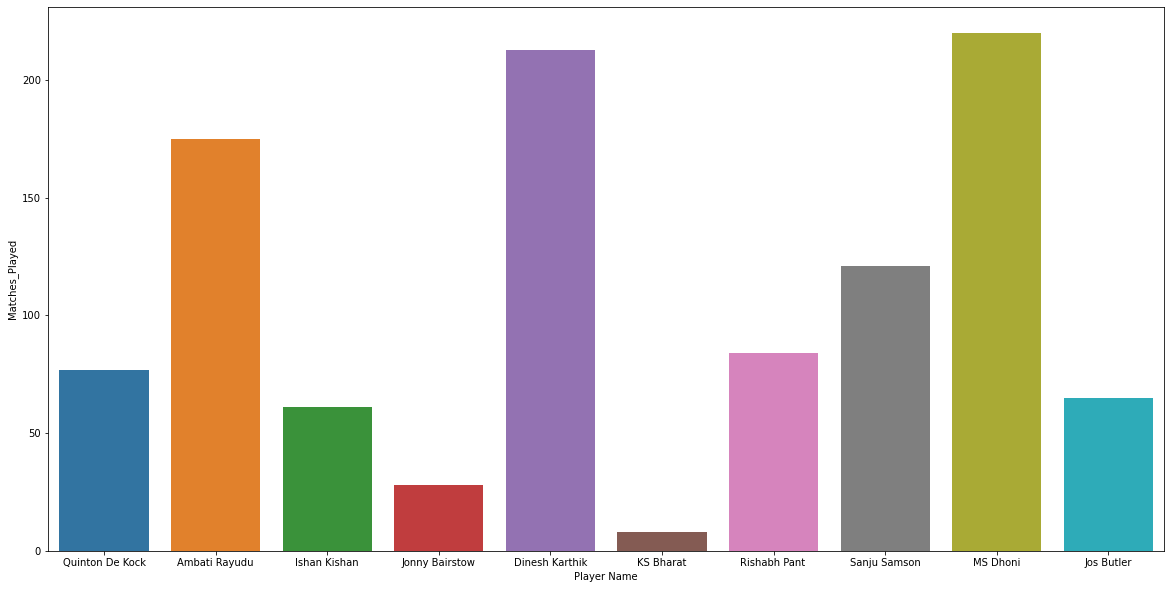

In [117]:
#Top keepers and matches played
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Matches_Played',data=top_keepers)

## Observation
MS Dhoni tops the chart in matches played followed by Dinesh Karthik and Ambati Rayudu, Rishabh Pant is in top 5

## Observation 
Overall we can consider MS Dhoni and Dinesh Karthik along with Rishabh Pant as 
top choices for wicket keeper

# Forming our best 11

For our final analysis we will consider the ratio of :

    1. 3 Batters
    2. 3 All rounders
    3. 4 Bowlers with 2 spin options
    4. 1 wicket keeper

In [122]:
## Batters for final 11 - KL Rahul, Virat Kohli, David Warner
top_batters.reset_index(drop=True)
matches_values = [top_batters.iloc[6]['Matches_Played'],top_batters.iloc[2]['Matches_Played'],top_batters.iloc[5]['Matches_Played']]

In [123]:
runs_values = [top_batters.iloc[6]['Runs'], top_batters.iloc[2]['Runs'], top_batters.iloc[5]['Runs']]

In [124]:
average_values = [top_batters.iloc[6]['Average'], top_batters.iloc[2]['Average'], top_batters.iloc[5]['Average']]

In [125]:
Strikerate_values = [top_batters.iloc[6]['Strike_Rate'], top_batters.iloc[2]['Strike_Rate'], top_batters.iloc[5]['Strike_Rate']]

In [126]:
Labels = ['KL Rahul','David Warner','Virat Kohli']

<AxesSubplot:title={'center':'Average'}>

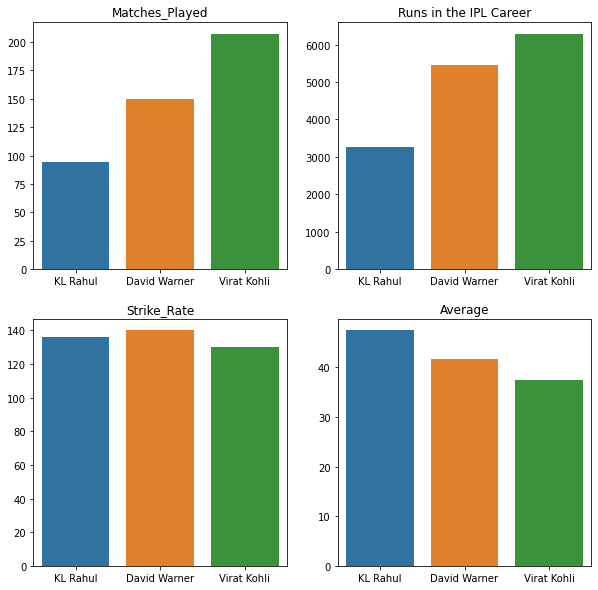

In [130]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
axes[0][0].set_title('Matches_Played')
axes[0][1].set_title('Runs in the IPL Career')
axes[1][0].set_title('Strike_Rate')
axes[1][1].set_title('Average')
sns.barplot(x=Labels,y=matches_values,ax=axes[0][0])
sns.barplot(x=Labels,y=runs_values,ax=axes[0][1])
sns.barplot(x=Labels,y=Strikerate_values,ax=axes[1][0])
sns.barplot(x=Labels,y=average_values,ax=axes[1][1])

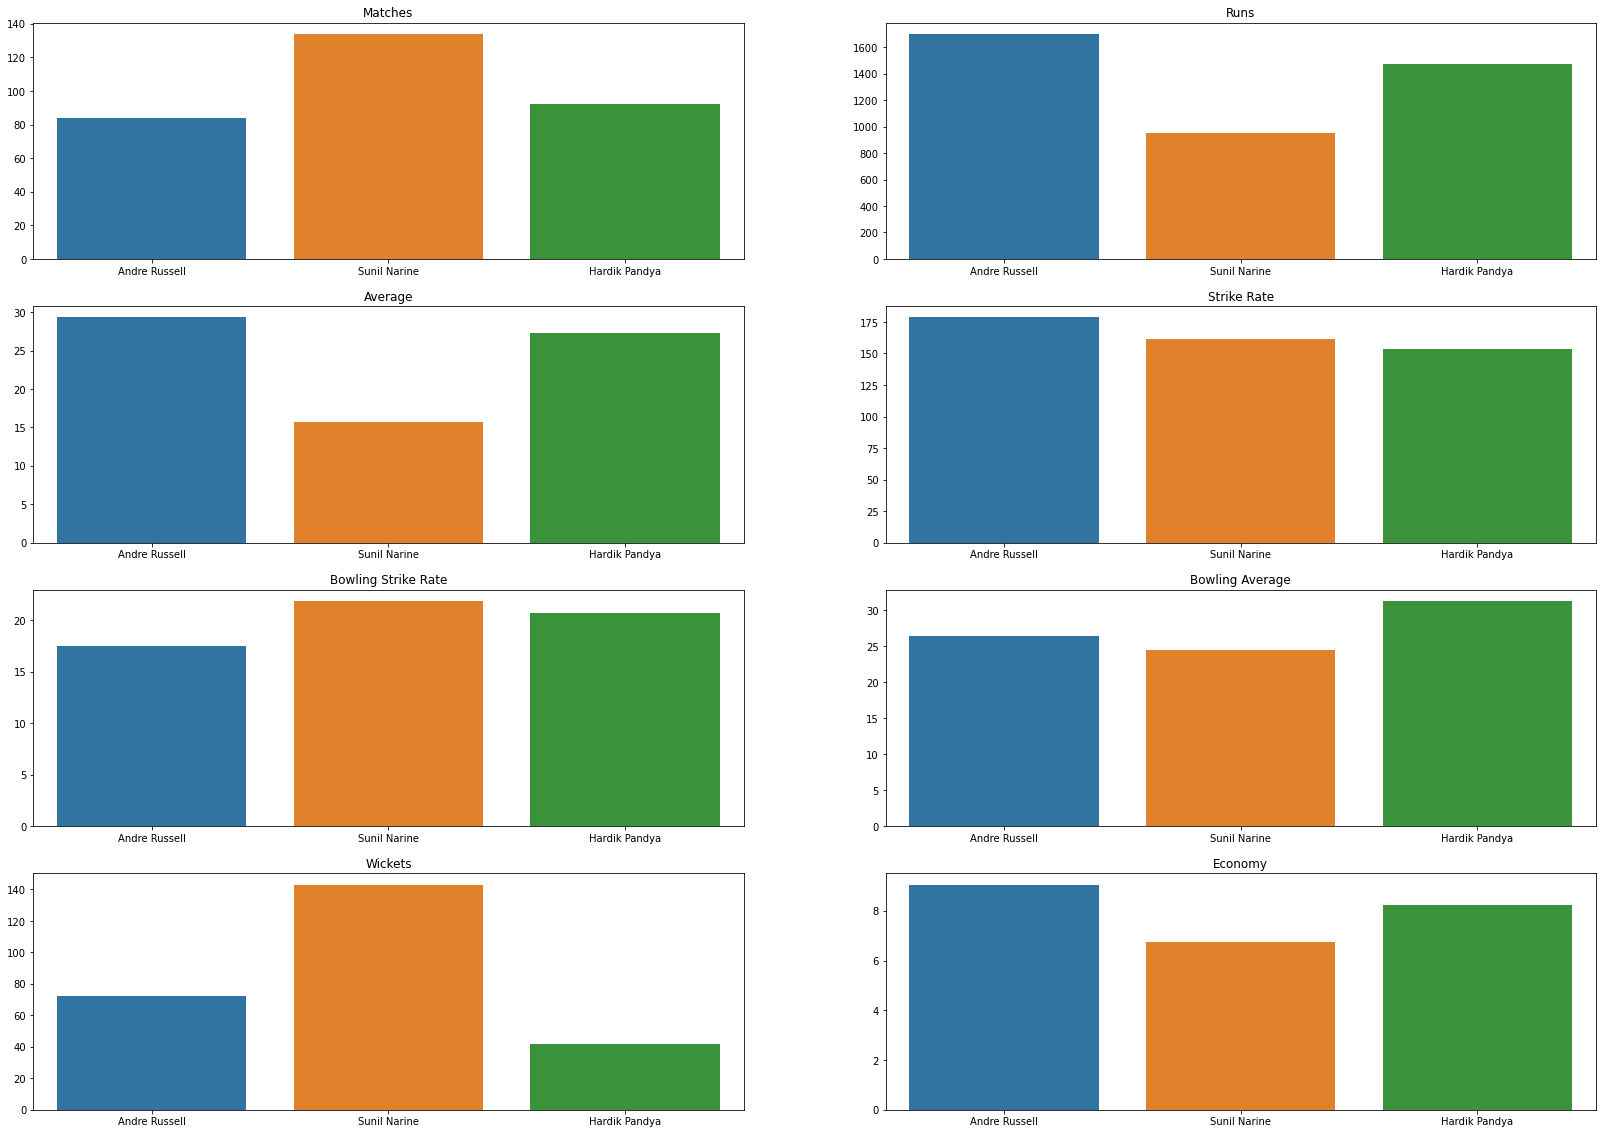

In [132]:
# Allrounders for the final 11 - Andre Russell, Sunil Narine, Hardik Pandya

top_allrounders.reset_index(drop=True)

matches_values = [
    top_allrounders.iloc[5]['Matches_Played'],
    top_allrounders.iloc[9]['Matches_Played'],
    top_allrounders.iloc[6]['Matches_Played']
]

runs_values = [
    top_allrounders.iloc[5]['Runs'],
    top_allrounders.iloc[9]['Runs'],
    top_allrounders.iloc[6]['Runs']
]

average_values = [
    top_allrounders.iloc[5]['Average'],
    top_allrounders.iloc[9]['Average'],
    top_allrounders.iloc[6]['Average']
]

strike_rate_values = [
    top_allrounders.iloc[5]['Strike_Rate'],
    top_allrounders.iloc[9]['Strike_Rate'],
    top_allrounders.iloc[6]['Strike_Rate']
]

bowling_strike_rate_values = [
    top_allrounders.iloc[5]['Bowling_Strike_Rate'],
    top_allrounders.iloc[9]['Bowling_Strike_Rate'],
    top_allrounders.iloc[6]['Bowling_Strike_Rate']
]

bowling_average_values = [
    top_allrounders.iloc[5]['Bowling_average'],
    top_allrounders.iloc[9]['Bowling_average'],
    top_allrounders.iloc[6]['Bowling_average']
]

wickets_values = [
    top_allrounders.iloc[5]['Wickets'],
    top_allrounders.iloc[9]['Wickets'],
    top_allrounders.iloc[6]['Wickets']
]

economy_values = [
    top_allrounders.iloc[5]['Economy'],
    top_allrounders.iloc[9]['Economy'],
    top_allrounders.iloc[0]['Economy']  # Corrected 'o' to '0'
]

labels = ['Andre Russell', 'Sunil Narine', 'Hardik Pandya']  # Corrected double quotes

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 2, figsize=(28, 20))

axes[0][0].set_title("Matches")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Average")
axes[1][1].set_title("Strike Rate")
axes[2][0].set_title("Bowling Strike Rate")
axes[2][1].set_title("Bowling Average")
axes[3][0].set_title("Wickets")
axes[3][1].set_title("Economy")

sns.barplot(x=labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=labels, y=average_values, ax=axes[1][0])
sns.barplot(x=labels, y=strike_rate_values, ax=axes[1][1])
sns.barplot(x=labels, y=bowling_strike_rate_values, ax=axes[2][0])
sns.barplot(x=labels, y=bowling_average_values, ax=axes[2][1])
sns.barplot(x=labels, y=wickets_values, ax=axes[3][0])
sns.barplot(x=labels, y=economy_values, ax=axes[3][1])

plt.show()


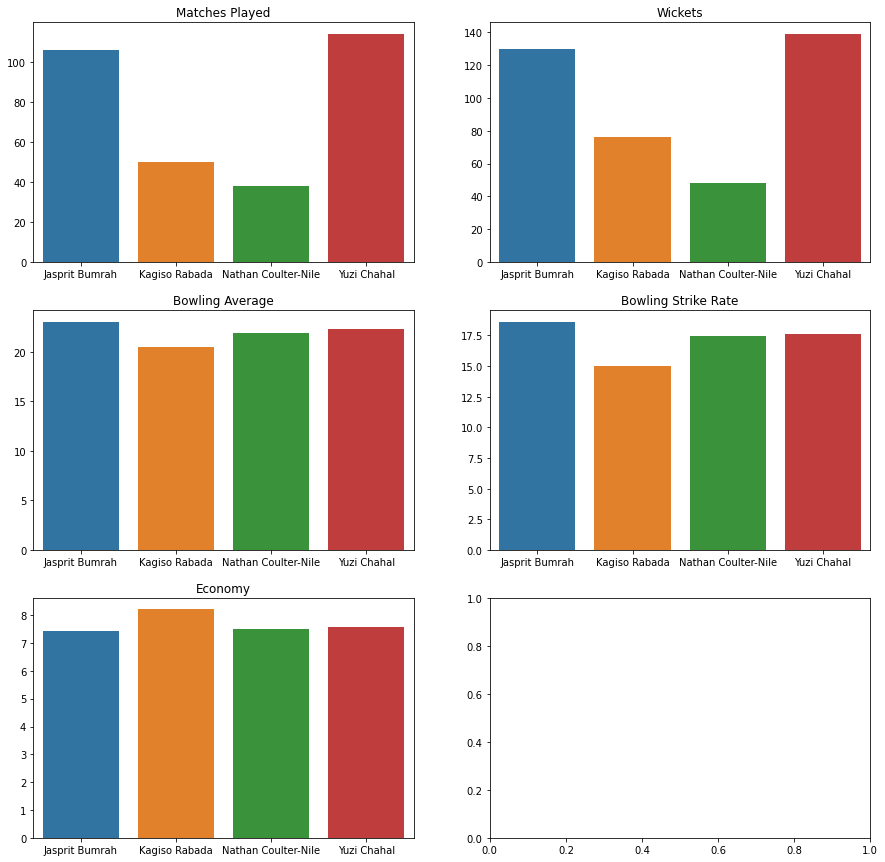

In [135]:
# Bowlers for the final 11 - Jasprit Bumrah, Kagiso Rabada, Nathan Coulter-Nile, Yuzi Chahal

top_bowlers.reset_index(drop=True)

matches_values = [
    top_bowlers.iloc[10]['Matches_Played'],
    top_bowlers.iloc[0]['Matches_Played'],
    top_bowlers.iloc[7]['Matches_Played'],
    top_bowlers.iloc[1]['Matches_Played']
]

wickets_values = [
    top_bowlers.iloc[10]['Wickets'],
    top_bowlers.iloc[0]['Wickets'],
    top_bowlers.iloc[7]['Wickets'],
    top_bowlers.iloc[1]['Wickets']
]

bowling_average_values = [
    top_bowlers.iloc[10]['Bowling_average'],
    top_bowlers.iloc[0]['Bowling_average'],
    top_bowlers.iloc[7]['Bowling_average'],
    top_bowlers.iloc[1]['Bowling_average']
]

bowling_strike_rate_values = [
    top_bowlers.iloc[10]['Bowling_Strike_Rate'],
    top_bowlers.iloc[0]['Bowling_Strike_Rate'],
    top_bowlers.iloc[7]['Bowling_Strike_Rate'],
    top_bowlers.iloc[1]['Bowling_Strike_Rate']
]

economy_values = [
    top_bowlers.iloc[10]['Economy'],
    top_bowlers.iloc[0]['Economy'],
    top_bowlers.iloc[7]['Economy'],
    top_bowlers.iloc[1]['Economy']
]

labels = ['Jasprit Bumrah', 'Kagiso Rabada', 'Nathan Coulter-Nile', 'Yuzi Chahal']

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Wickets")
axes[1][0].set_title("Bowling Average")
axes[1][1].set_title("Bowling Strike Rate")
axes[2][0].set_title("Economy")

sns.barplot(x=labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=labels, y=wickets_values, ax=axes[0][1])
sns.barplot(x=labels, y=bowling_average_values, ax=axes[1][0])
sns.barplot(x=labels, y=bowling_strike_rate_values, ax=axes[1][1])
sns.barplot(x=labels, y=economy_values, ax=axes[2][0])

plt.show()


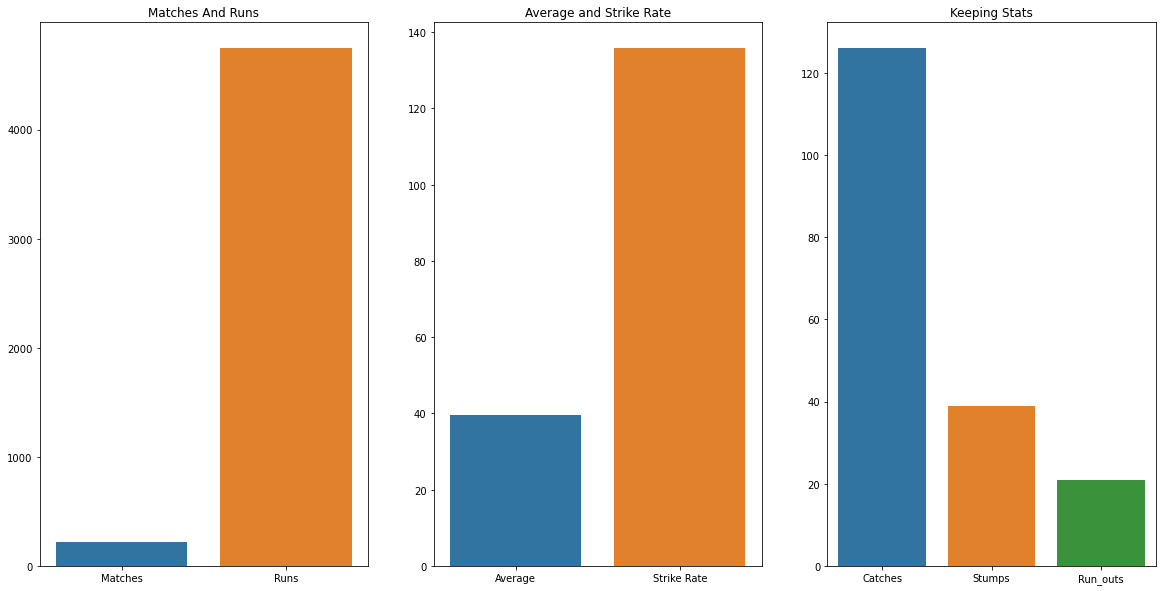

In [137]:
# Wicket Keeper For The Final 11 - MS Dhoni

matches_values = [top_keepers.iloc[8]['Matches_Played'], top_keepers.iloc[8]['Runs']]

average_values = [top_keepers.iloc[8]['Average'], top_keepers.iloc[8]['Strike_Rate']]

keeping_values = [top_keepers.iloc[8]['Catches'], top_keepers.iloc[8]['Stumps'], top_keepers.iloc[8]['Run_outs']]

label1 = ['Matches', 'Runs']

label2 = ['Average', 'Strike Rate']

label3 = ['Catches', 'Stumps', 'Run_outs']

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].set_title("Matches And Runs")
axes[1].set_title("Average and Strike Rate")
axes[2].set_title("Keeping Stats")

sns.barplot(x=label1, y=matches_values, ax=axes[0])
sns.barplot(x=label2, y=average_values, ax=axes[1])
sns.barplot(x=label3, y=keeping_values, ax=axes[2])

plt.show()


## FINAL 11 for the IPL Campaign

In [173]:
player_names = [
    'KL Rahul', 'David Warner', 'Virat Kohli',
    'Yuzvendra Chahal', 'Jasprit Bumrah', 'Nathan Coulter-Nile', 'Kagiso Rabada',
    'Andre Russell', 'Sunil Narine', 'Hardik Pandya',
    'MS Dhoni'
]

filtered_dfs = []

for name in player_names:
    filtered_df = df[df["Player Name"].str.contains(name, case=False)]
    if not filtered_df.empty:
        filtered_dfs.append(filtered_df[["Player Name", "Team", "Nationality"]])

if filtered_dfs:
    result_df = pd.concat(filtered_dfs, ignore_index=True)
    print(result_df)
else:
    print("No matching players found.")


            Player Name       Team Nationality
0             KL Rahul     Lucknow      Indian
1         David Warner       Delhi    Overseas
2           Virat Kohli  Bangalore      Indian
3     Yuzvendra Chahal   Rajasthan      Indian
4        Jasprit Bumrah     Mumbai      Indian
5   Nathan Coulter-Nile  Rajasthan    Overseas
6        Kagiso Rabada      Punjab    Overseas
7         Andre Russell    Kolkata    Overseas
8         Sunil Narine     Kolkata    Overseas
9         Hardik Pandya    Gujarat      Indian
10             MS Dhoni    Chennai      Indian
